Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Show Tensorflow Version

In [2]:
print(tf.__version__)

2.7.0


Load Flower Example Dataset

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)


228827136/228813984 [==============================] - 2s 0us/step


Check image count

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Set batch_size, img_height, img_with to value we used in course

In [5]:
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224


define data generator

In [6]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

Search for training & validation data


In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=data_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           subset='training')

validation_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=data_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


Found classes

In [8]:
print(train_data_gen.class_indices)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


display samples from training set

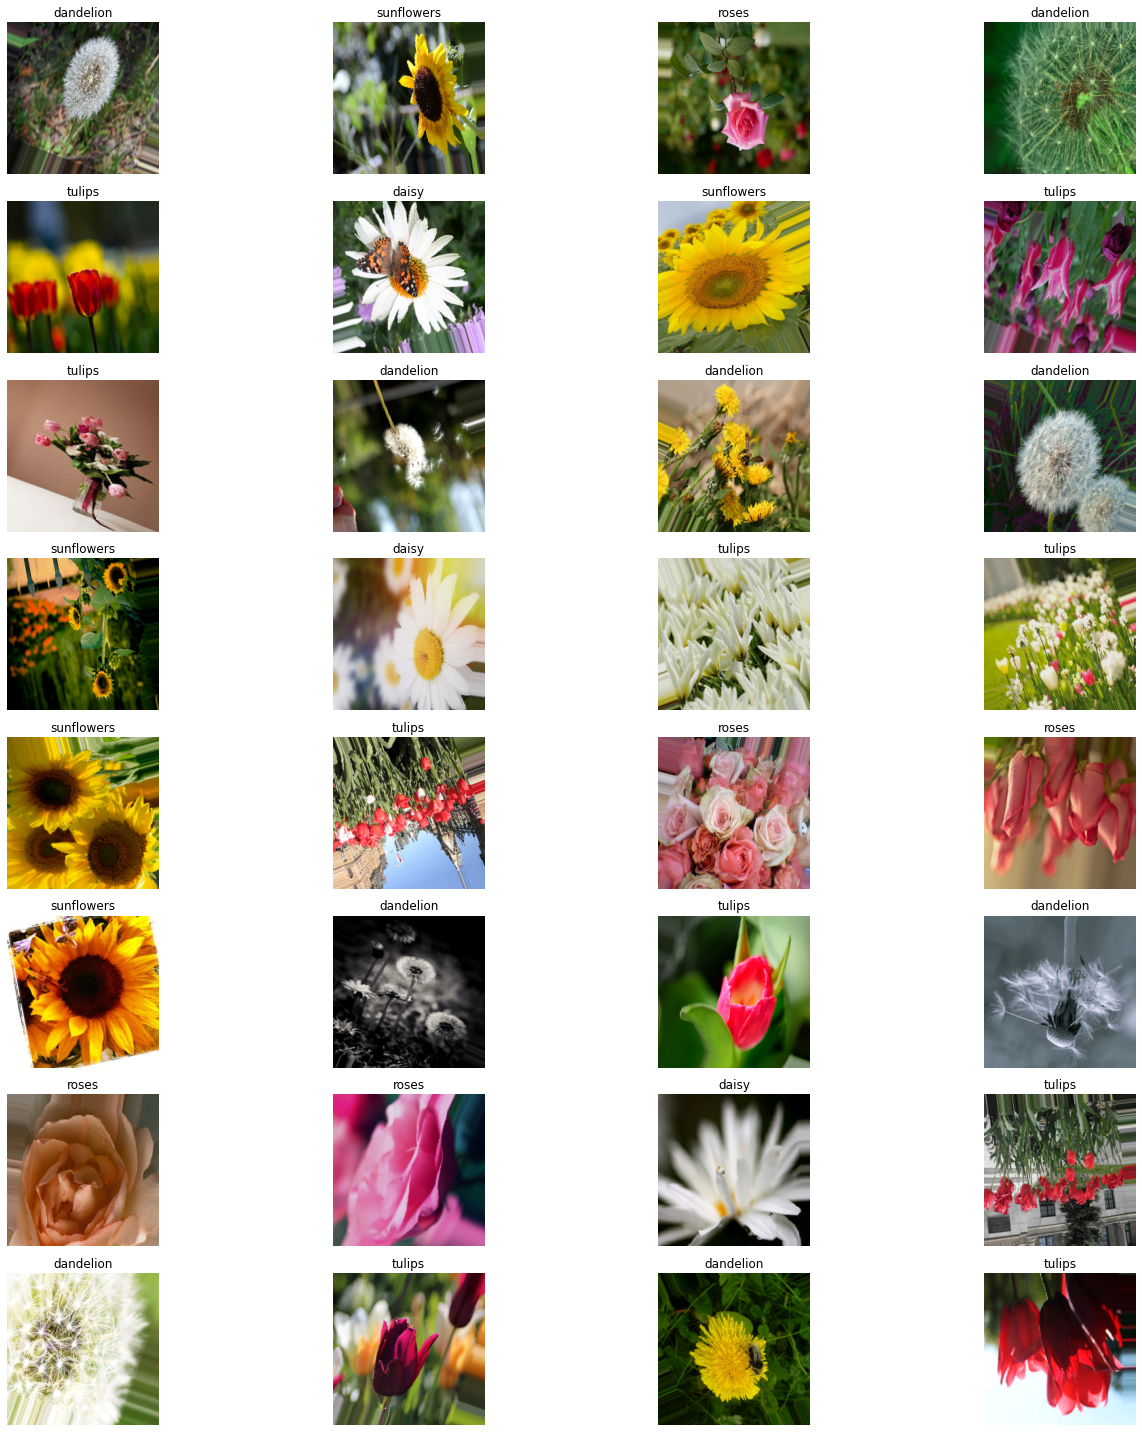

In [9]:
sample_training_images, labels = next(train_data_gen)
class_label = {v:k for k,v in train_data_gen.class_indices.items()}
fig, axes = plt.subplots(8, 4, figsize=(20,20))
axes = axes.flatten()
for img, label, ax in zip(sample_training_images, labels, axes):
    ax.set_title(class_label[np.argmax(label)])
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

# Test 1

use pre-trainined model

In [10]:
base_model_1 = tf.keras.applications.resnet_v2.ResNet50V2(
        include_top=False,
        pooling='max',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        weights='imagenet')

model_1 = tf.keras.Sequential([
    base_model_1,
    tf.keras.layers.Dense(512, 'relu'),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])
    
model_1.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 24,746,501
Trainable params: 24,701,061
Non-trainable params: 45,440
_________________________________________________________________


train only the fully connected layers

In [11]:
for layer in base_model_1.layers:
    layer.trainable = False
    
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history_1_1 = model_1.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 18s 5s/step - loss: 7.6074 - categorical_accuracy: 0.3229
Epoch 2/10
2/2 [==============================] - 14s 5s/step - loss: 8.5467 - categorical_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 14s 5s/step - loss: 3.0902 - categorical_accuracy: 0.5417
Epoch 4/10
2/2 [==============================] - 14s 5s/step - loss: 2.8815 - categorical_accuracy: 0.5625
Epoch 5/10
2/2 [==============================] - 14s 5s/step - loss: 2.3012 - categorical_accuracy: 0.5833
Epoch 6/10
2/2 [==============================] - 15s 5s/step - loss: 1.6800 - categorical_accuracy: 0.6458
Epoch 7/10
2/2 [==============================] - 14s 5s/step - loss: 1.7584 - categorical_accuracy: 0.6146
Epoch 8/10
2/2 [==============================] - 14s 5s/step - loss: 1.7777 - categorical_accuracy: 0.6562
Epoch 9/10
2/2 [==============================] - 14s 5s/step - loss: 1.1216 - categorical_accuracy: 0.7500
Epoch 10/10
2/2 [===========

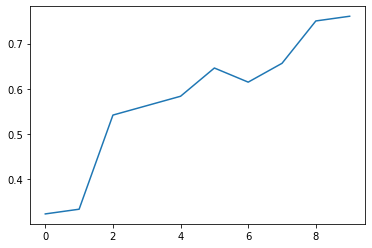

In [12]:
plt.plot(history_1_1.history['categorical_accuracy'])

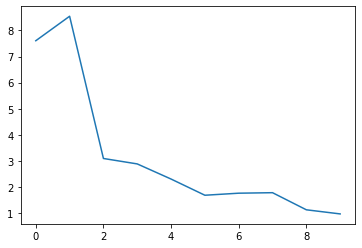

In [13]:
plt.plot(history_1_1.history['loss'])

In [14]:
result1_1 = model_1.evaluate(validation_data_gen)

23/23 [==============================] - 107s 5s/step - loss: 1.0604 - categorical_accuracy: 0.7346


train complete network

In [15]:
for layer in base_model_1.layers:
    layer.trainable = True
    
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history1_2 = model_1.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 64s 20s/step - loss: 5.1384 - categorical_accuracy: 0.4167
Epoch 2/10
2/2 [==============================] - 58s 20s/step - loss: 1.7861 - categorical_accuracy: 0.6042
Epoch 3/10
2/2 [==============================] - 60s 21s/step - loss: 1.3413 - categorical_accuracy: 0.5312
Epoch 4/10
2/2 [==============================] - 57s 20s/step - loss: 1.5466 - categorical_accuracy: 0.5208
Epoch 5/10
2/2 [==============================] - 57s 20s/step - loss: 1.2947 - categorical_accuracy: 0.4792
Epoch 6/10
2/2 [==============================] - 57s 20s/step - loss: 1.1292 - categorical_accuracy: 0.6354
Epoch 7/10
2/2 [==============================] - 57s 20s/step - loss: 1.0612 - categorical_accuracy: 0.6042
Epoch 8/10
2/2 [==============================] - 57s 20s/step - loss: 0.9747 - categorical_accuracy: 0.6667
Epoch 9/10
2/2 [==============================] - 57s 20s/step - loss: 1.1057 - categorical_accuracy: 0.6458
Epoch 10/10
2/2 [==

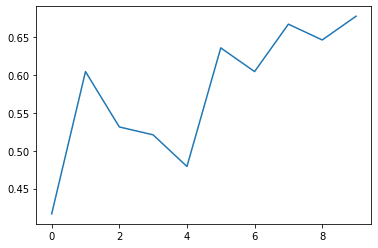

In [16]:
plt.plot(history1_2.history['categorical_accuracy'])

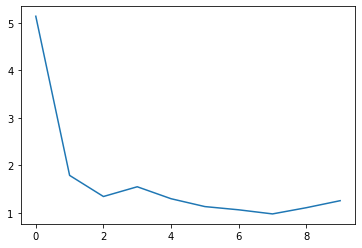

In [17]:
plt.plot(history1_2.history['loss'])

In [18]:
result1_2 = model_1.evaluate(validation_data_gen)

23/23 [==============================] - 107s 5s/step - loss: 85.4936 - categorical_accuracy: 0.2257


# Test 2 - 4 dense layers



use pre-trainined model


In [19]:
base_model_2 = tf.keras.applications.resnet_v2.ResNet50V2(
        include_top=False,
        pooling='max',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        weights='imagenet')

model_2 = tf.keras.Sequential([
    base_model_2,
    tf.keras.layers.Dense(512, 'relu'),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])
    
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
Total params: 24,778,757
Trainable params: 24,733,317
Non-trainable params: 45,440
_________________________________________________________________


train only the fully connected layers

In [20]:
for layer in base_model_2.layers:
    layer.trainable = False
    
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history_2_1 = model_2.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 18s 5s/step - loss: 9.5696 - categorical_accuracy: 0.1771
Epoch 2/10
2/2 [==============================] - 14s 5s/step - loss: 3.4583 - categorical_accuracy: 0.5104
Epoch 3/10
2/2 [==============================] - 14s 5s/step - loss: 2.3839 - categorical_accuracy: 0.5208
Epoch 4/10
2/2 [==============================] - 14s 5s/step - loss: 2.2105 - categorical_accuracy: 0.4479
Epoch 5/10
2/2 [==============================] - 14s 5s/step - loss: 2.5756 - categorical_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 14s 5s/step - loss: 2.7711 - categorical_accuracy: 0.6146
Epoch 7/10
2/2 [==============================] - 14s 5s/step - loss: 1.2313 - categorical_accuracy: 0.6146
Epoch 8/10
2/2 [==============================] - 14s 5s/step - loss: 1.3808 - categorical_accuracy: 0.5729
Epoch 9/10
2/2 [==============================] - 14s 5s/step - loss: 1.0520 - categorical_accuracy: 0.7083
Epoch 10/10
2/2 [===========

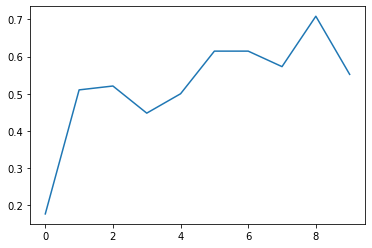

In [21]:
plt.plot(history_2_1.history['categorical_accuracy'])

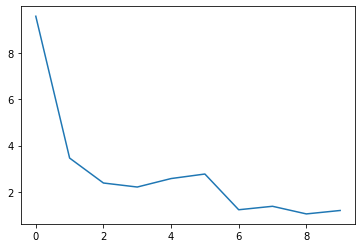

In [22]:
plt.plot(history_2_1.history['loss'])

In [23]:
result2_1 = model_2.evaluate(validation_data_gen)

23/23 [==============================] - 106s 5s/step - loss: 0.9968 - categorical_accuracy: 0.6484


train complete network

In [24]:
for layer in base_model_2.layers:
    layer.trainable = True
    
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history2_2 = model_2.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 64s 20s/step - loss: 3.1006 - categorical_accuracy: 0.4062
Epoch 2/10
2/2 [==============================] - 58s 20s/step - loss: 1.6683 - categorical_accuracy: 0.4167
Epoch 3/10
2/2 [==============================] - 62s 21s/step - loss: 1.1203 - categorical_accuracy: 0.5625
Epoch 4/10
2/2 [==============================] - 58s 20s/step - loss: 1.0185 - categorical_accuracy: 0.6146
Epoch 5/10
2/2 [==============================] - 58s 20s/step - loss: 1.0227 - categorical_accuracy: 0.6875
Epoch 6/10
2/2 [==============================] - 58s 20s/step - loss: 1.3375 - categorical_accuracy: 0.5625
Epoch 7/10
2/2 [==============================] - 59s 21s/step - loss: 1.2202 - categorical_accuracy: 0.5938
Epoch 8/10
2/2 [==============================] - 58s 20s/step - loss: 1.1141 - categorical_accuracy: 0.6354
Epoch 9/10
2/2 [==============================] - 58s 20s/step - loss: 1.0441 - categorical_accuracy: 0.6250
Epoch 10/10
2/2 [==

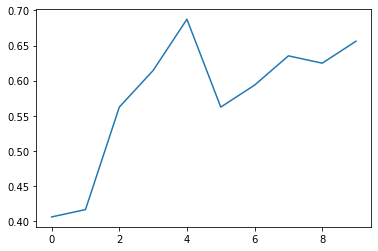

In [25]:
plt.plot(history2_2.history['categorical_accuracy'])

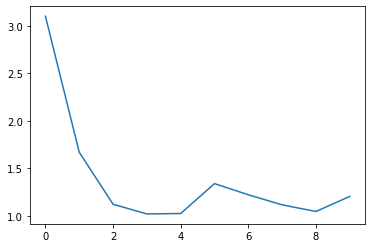

In [26]:
plt.plot(history2_2.history['loss'])

In [27]:
result2_2 = model_2.evaluate(validation_data_gen)

23/23 [==============================] - 106s 5s/step - loss: 2484.7368 - categorical_accuracy: 0.1943


#Test 3 - 2 dense layers

use pre-trainined model

In [28]:
base_model_3 = tf.keras.applications.resnet_v2.ResNet50V2(
        include_top=False,
        pooling='max',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        weights='imagenet')

model_3 = tf.keras.Sequential([
    base_model_3,
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])
    
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_7 (Dense)             (None, 256)               524544    
                                                                 
 dense_8 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 24,090,629
Trainable params: 24,045,189
Non-trainable params: 45,440
_________________________________________________________________


train only the fully connected layers

In [29]:
for layer in base_model_3.layers:
    layer.trainable = False
    
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history_3_1 = model_3.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 18s 5s/step - loss: 16.3211 - categorical_accuracy: 0.3021
Epoch 2/10
2/2 [==============================] - 14s 5s/step - loss: 11.2619 - categorical_accuracy: 0.3438
Epoch 3/10
2/2 [==============================] - 14s 5s/step - loss: 3.5922 - categorical_accuracy: 0.5833
Epoch 4/10
2/2 [==============================] - 14s 5s/step - loss: 4.0579 - categorical_accuracy: 0.5521
Epoch 5/10
2/2 [==============================] - 14s 5s/step - loss: 2.8832 - categorical_accuracy: 0.6458
Epoch 6/10
2/2 [==============================] - 15s 5s/step - loss: 1.7407 - categorical_accuracy: 0.6979
Epoch 7/10
2/2 [==============================] - 14s 5s/step - loss: 1.7789 - categorical_accuracy: 0.6354
Epoch 8/10
2/2 [==============================] - 14s 5s/step - loss: 1.6726 - categorical_accuracy: 0.6979
Epoch 9/10
2/2 [==============================] - 14s 5s/step - loss: 1.6163 - categorical_accuracy: 0.6562
Epoch 10/10
2/2 [=========

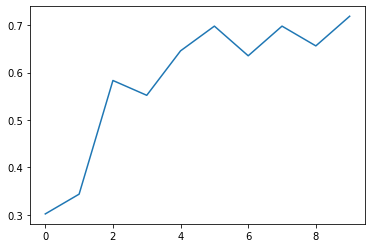

In [30]:
plt.plot(history_3_1.history['categorical_accuracy'])

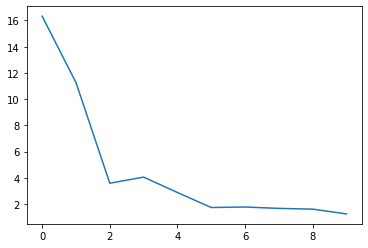

In [31]:
plt.plot(history_3_1.history['loss'])

In [32]:
result3_1 = model_3.evaluate(validation_data_gen)

23/23 [==============================] - 106s 5s/step - loss: 1.1519 - categorical_accuracy: 0.7250


train complete network

In [33]:
for layer in base_model_3.layers:
    layer.trainable = True
    
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history3_2 = model_3.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 65s 21s/step - loss: 3.5199 - categorical_accuracy: 0.4583
Epoch 2/10
2/2 [==============================] - 59s 21s/step - loss: 2.9558 - categorical_accuracy: 0.5104
Epoch 3/10
2/2 [==============================] - 58s 21s/step - loss: 1.7836 - categorical_accuracy: 0.5417
Epoch 4/10
2/2 [==============================] - 58s 21s/step - loss: 2.3996 - categorical_accuracy: 0.5417
Epoch 5/10
2/2 [==============================] - 55s 19s/step - loss: 1.5528 - categorical_accuracy: 0.6044
Epoch 6/10
2/2 [==============================] - 58s 20s/step - loss: 1.0982 - categorical_accuracy: 0.6042
Epoch 7/10
2/2 [==============================] - 58s 20s/step - loss: 0.9517 - categorical_accuracy: 0.7396
Epoch 8/10
2/2 [==============================] - 58s 20s/step - loss: 1.1946 - categorical_accuracy: 0.6667
Epoch 9/10
2/2 [==============================] - 62s 21s/step - loss: 0.8453 - categorical_accuracy: 0.6667
Epoch 10/10
2/2 [==

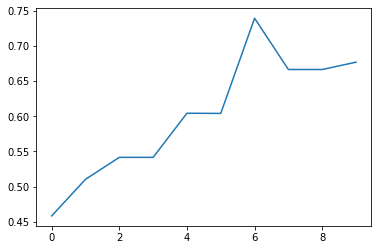

In [34]:
plt.plot(history3_2.history['categorical_accuracy'])

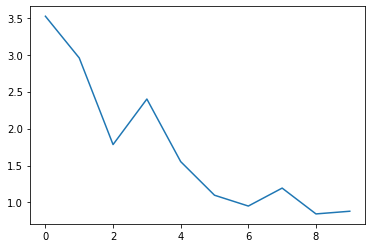

In [35]:
plt.plot(history3_2.history['loss'])

In [36]:
result3_2 = model_3.evaluate(validation_data_gen)

23/23 [==============================] - 106s 5s/step - loss: 415.6469 - categorical_accuracy: 0.2435


#Test 4 - 5 dense layers

use pre-trainined model

In [46]:
base_model_4 = tf.keras.applications.resnet_v2.ResNet50V2(
        include_top=False,
        pooling='max',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        weights='imagenet')

model_4 = tf.keras.Sequential([
    base_model_4,
    tf.keras.layers.Dense(1024, 'relu'),
    tf.keras.layers.Dense(512, 'relu'),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])
    
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_14 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 5)                 645       
                                                                 
Total params: 26,352,645
Trainable params: 26,307,205


train only the fully connected layers

In [47]:
for layer in base_model_4.layers:
    layer.trainable = False
    
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history_4_1 = model_4.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 18s 5s/step - loss: 10.1653 - categorical_accuracy: 0.2188
Epoch 2/10
2/2 [==============================] - 15s 5s/step - loss: 9.2724 - categorical_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - 15s 5s/step - loss: 2.8702 - categorical_accuracy: 0.3646
Epoch 4/10
2/2 [==============================] - 15s 5s/step - loss: 1.7655 - categorical_accuracy: 0.3542
Epoch 5/10
2/2 [==============================] - 14s 5s/step - loss: 1.1032 - categorical_accuracy: 0.6042
Epoch 6/10
2/2 [==============================] - 14s 5s/step - loss: 1.1931 - categorical_accuracy: 0.5521
Epoch 7/10
2/2 [==============================] - 14s 5s/step - loss: 1.0032 - categorical_accuracy: 0.6354
Epoch 8/10
2/2 [==============================] - 15s 5s/step - loss: 0.8156 - categorical_accuracy: 0.6771
Epoch 9/10
2/2 [==============================] - 14s 5s/step - loss: 0.7237 - categorical_accuracy: 0.7708
Epoch 10/10
2/2 [==========

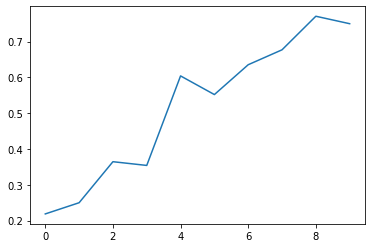

In [48]:
plt.plot(history_4_1.history['categorical_accuracy'])

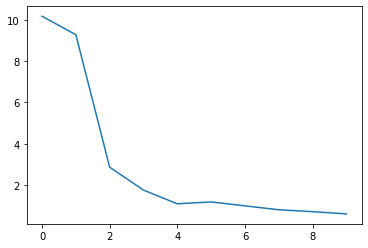

In [49]:
plt.plot(history_4_1.history['loss'])

In [50]:
result4_1 = model_4.evaluate(validation_data_gen)

23/23 [==============================] - 107s 5s/step - loss: 0.7418 - categorical_accuracy: 0.7332


train complete network

In [51]:
for layer in base_model_4.layers:
    layer.trainable = True
    
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history4_2 = model_4.fit(
    train_data_gen,
    steps_per_epoch= len(train_data_gen) / batch_size,
    epochs=10
)

Epoch 1/10
2/2 [==============================] - 66s 20s/step - loss: 3.8937 - categorical_accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 58s 20s/step - loss: 1.5284 - categorical_accuracy: 0.4062
Epoch 3/10
2/2 [==============================] - 58s 20s/step - loss: 1.1608 - categorical_accuracy: 0.5833
Epoch 4/10
2/2 [==============================] - 58s 20s/step - loss: 1.2972 - categorical_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 58s 20s/step - loss: 0.9700 - categorical_accuracy: 0.5938
Epoch 6/10
2/2 [==============================] - 58s 20s/step - loss: 1.1018 - categorical_accuracy: 0.5833
Epoch 7/10
2/2 [==============================] - 58s 20s/step - loss: 1.1133 - categorical_accuracy: 0.6458
Epoch 8/10
2/2 [==============================] - 63s 23s/step - loss: 1.2589 - categorical_accuracy: 0.5729
Epoch 9/10
2/2 [==============================] - 58s 20s/step - loss: 1.2250 - categorical_accuracy: 0.6771
Epoch 10/10
2/2 [==

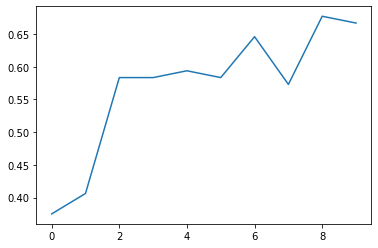

In [52]:
plt.plot(history4_2.history['categorical_accuracy'])

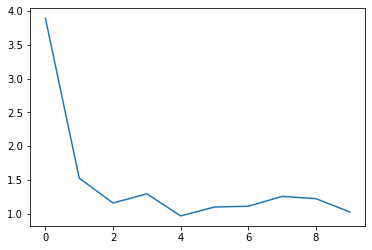

In [53]:
plt.plot(history4_2.history['loss'])

In [54]:
result4_2 = model_4.evaluate(validation_data_gen)

23/23 [==============================] - 106s 5s/step - loss: 21.2725 - categorical_accuracy: 0.2312


# Charts

In [68]:
plt.rcParams["figure.figsize"] = (16,9)

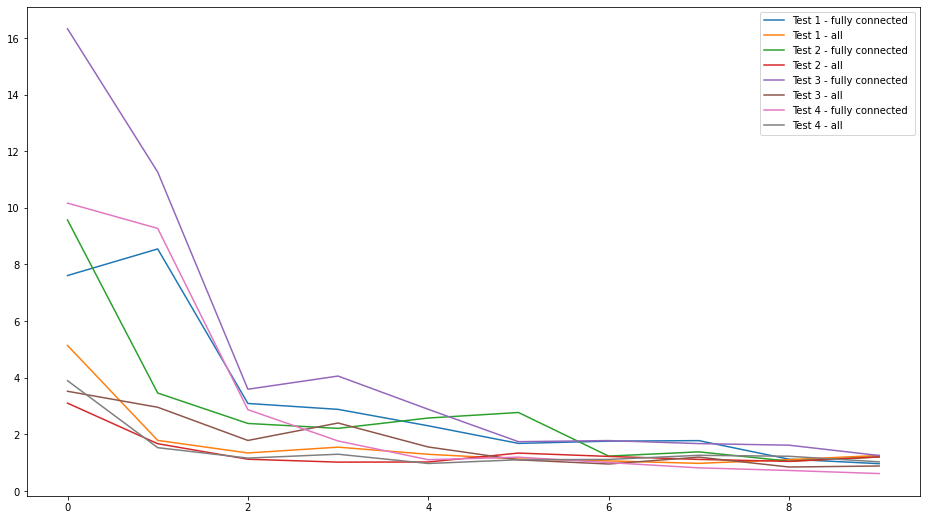

In [69]:
plt.plot(history_1_1.history['loss'],label="Test 1 - fully connected ")
plt.plot(history1_2.history['loss'],label="Test 1 - all ")

plt.plot(history_2_1.history['loss'],label="Test 2 - fully connected ")
plt.plot(history2_2.history['loss'],label="Test 2 - all ")

plt.plot(history_3_1.history['loss'],label="Test 3 - fully connected ")
plt.plot(history3_2.history['loss'],label="Test 3 - all ")

plt.plot(history_4_1.history['loss'],label="Test 4 - fully connected ")
plt.plot(history4_2.history['loss'],label="Test 4 - all ")

plt.legend()

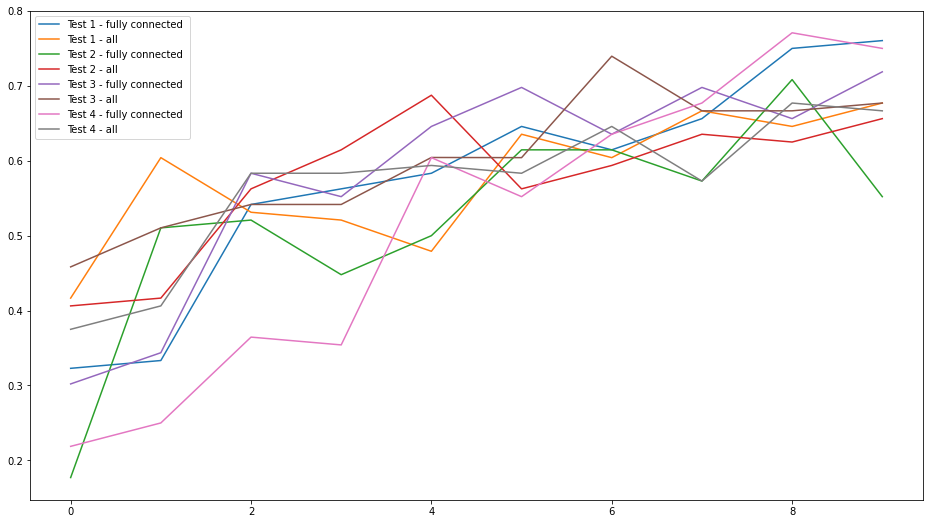

In [70]:
plt.plot(history_1_1.history['categorical_accuracy'],label="Test 1 - fully connected ")
plt.plot(history1_2.history['categorical_accuracy'],label="Test 1 - all ")

plt.plot(history_2_1.history['categorical_accuracy'],label="Test 2 - fully connected ")
plt.plot(history2_2.history['categorical_accuracy'],label="Test 2 - all ")

plt.plot(history_3_1.history['categorical_accuracy'],label="Test 3 - fully connected ")
plt.plot(history3_2.history['categorical_accuracy'],label="Test 3 - all ")

plt.plot(history_4_1.history['categorical_accuracy'],label="Test 4 - fully connected ")
plt.plot(history4_2.history['categorical_accuracy'],label="Test 4 - all ")

plt.legend()